In [14]:
!pip install yfinance

In [15]:
import yfinance as yf


## Import libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


## Load data

In [17]:
# 2. Downloading  stock market data

# Define parameters
ticker = "PLTR"   # HERE I am using Palantir Technologies Inc (PLTR) - Up 203% over the past year.
start_date = "2022-01-01"
end_date = "2025-02-28"

# Download historical data
df = yf.download(ticker, start=start_date, end=end_date)

# Display first 5 rows
print("Data Overview:")
print(df.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data Overview:
Price           Close       High        Low       Open    Volume
Ticker           PLTR       PLTR       PLTR       PLTR      PLTR
Date                                                            
2022-01-03  18.530001  18.569000  17.860001  18.360001  34283600
2022-01-04  18.170000  18.840000  17.790001  18.610001  39643200
2022-01-05  16.959999  18.568001  16.870001  18.030001  58445900
2022-01-06  16.740000  17.180000  16.055000  16.870001  49737100
2022-01-07  16.559999  17.330000  16.475000  16.700001  37989300


## Split train and validation

In [18]:
lengh_data = len(df)
split_ratio = 0.8
lengh_train = round(lengh_data * split_ratio)
lengh_validation = lengh_data -lengh_train

In [19]:
print('lengh data :',lengh_data )
print('lengh train :', lengh_train)
print('lengh validation :', lengh_validation)

lengh data : 791
lengh train : 633
lengh validation : 158


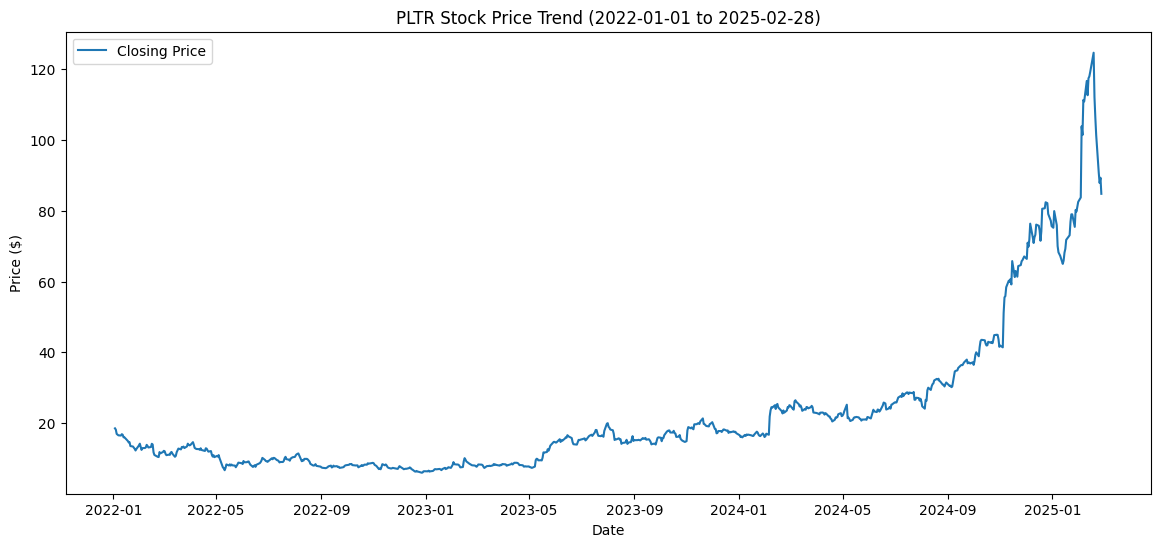

In [20]:
# 3. Visualization of  the trends from 2022 to 2025(feb) and choosing label as closing price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f'{ticker} Stock Price Trend ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [21]:
train_data = df[:lengh_train][['Close']].copy() # Select only the 'Close' column and create a copy
train_data['Date'] = df.index[:lengh_train] # Add a 'Date' column from the index of the original DataFrame
train_data['Date'] = pd.to_datetime(train_data['Date'])  # Convert 'Date' column to datetime

In [22]:
# Create validation_data DataFrame with 'Close' column and 'Date' as index
validation_data = df[lengh_train:][['Close']].copy()
validation_data['Date'] = df.index[lengh_train:]  # Add 'Date' column from original DataFrame index
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # Convert 'Date' to datetime

In [24]:
dataset_train = train_data.Close.values
dataset_train.shape

(633, 1)

In [25]:
# reshape
dataset_train = np.reshape(dataset_train,(-1,1))
dataset_train.shape

(633, 1)

In [26]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train_scaled = scaler.fit_transform(dataset_train)

Text(0, 0.5, 'Close price')

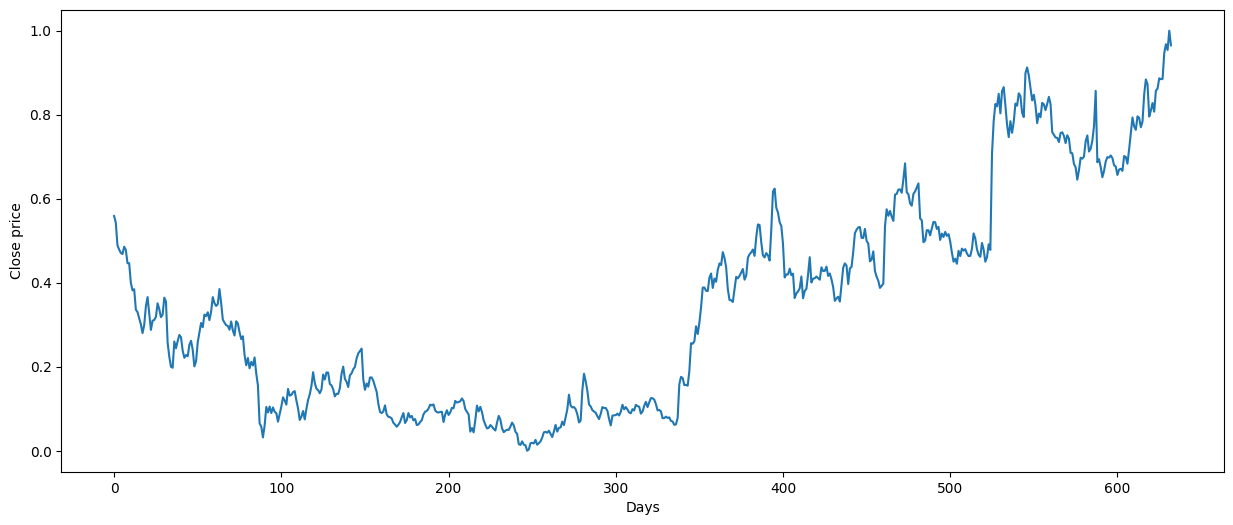

In [30]:
# visualize data
plt.subplots(figsize=(15,6))
plt.plot(dataset_train_scaled)
plt.xlabel('Days')
plt.ylabel('Close price')

In [31]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, lengh_train):
    # time_step=50, length_train=880, [51-50, 51]
    X_train.append(dataset_train_scaled[i-time_step:i, 0])
    y_train.append(dataset_train_scaled[i, 0])


X_train, y_train = np.array(X_train), np.array(y_train)



In [32]:
X_train.shape

(583, 50)

In [33]:
#reshape and expand dim
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0] ,1))

print(X_train.shape)
print(y_train.shape)

(583, 50, 1)
(583, 1)


## RNN Model Architecture

In [35]:
reg =Sequential()
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
reg.add(Dropout(0.2))
reg.add(SimpleRNN(units=50))
reg.add(Dropout(0.2))


reg.add(Dense(units=1))

## Model Compile

In [36]:
reg.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = reg.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.0044 - loss: 0.4709
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0035 - loss: 0.2480
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0028 - loss: 0.1756
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0024 - loss: 0.1710
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 6.6367e-04 - loss: 0.0948
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 5.5207e-04 - loss: 0.0924
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.0024 - loss: 0.0710
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.0033 - loss: 0.0592
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 7.8387e-04 - loss: 0.0504
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0070 - loss: 0.0467
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0050 - loss: 0.0338
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 

In [37]:
y_pred = reg.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [39]:
y_train = scaler.inverse_transform(y_train)

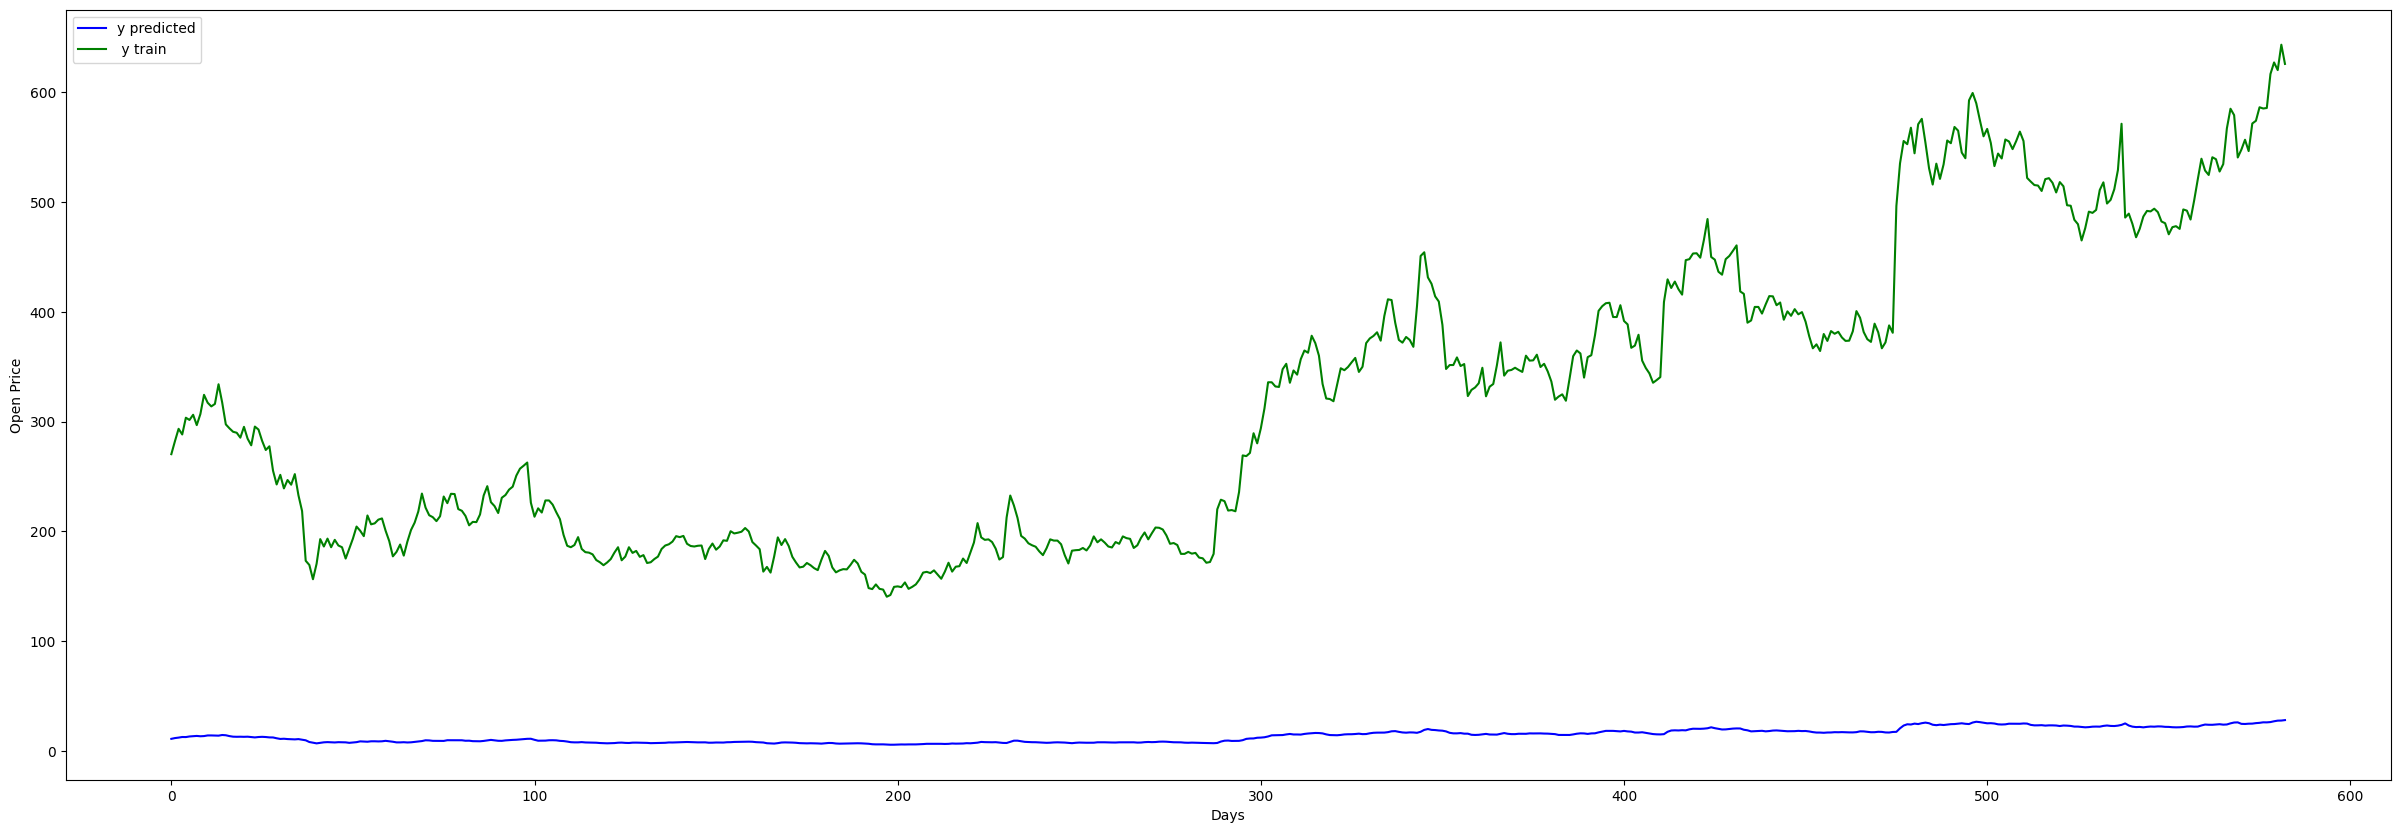

In [40]:
# plot Y_train and Y_pred
plt.figure(figsize=(30, 10))
plt.plot(y_pred, color='b', label='y predicted')
plt.plot(y_train, color = 'g', label = ' y train')

plt.xlabel('Days')
plt.ylabel('Open Price')


plt.legend()

plt.show()

# Evaluate model on validation data

In [41]:
dataset_validation = validation_data.Close.values
dataset_validation = np.reshape(dataset_validation, (-1, 1))
scaled_dataset_validation = scaler.fit_transform(dataset_validation)
scaled_dataset_validation.shape

(158, 1)

In [42]:
y_test = []
X_test = []


for i in range(time_step, lengh_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i, 0])
    y_test.append(scaled_dataset_validation[i, 0])

In [43]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (-1, 1))

In [45]:
X_test.shape

(108, 50, 1)

In [46]:
y_pred_of_test = reg.predict(X_test)
y_pred_of_test = scaler.inverse_transform(y_pred_of_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


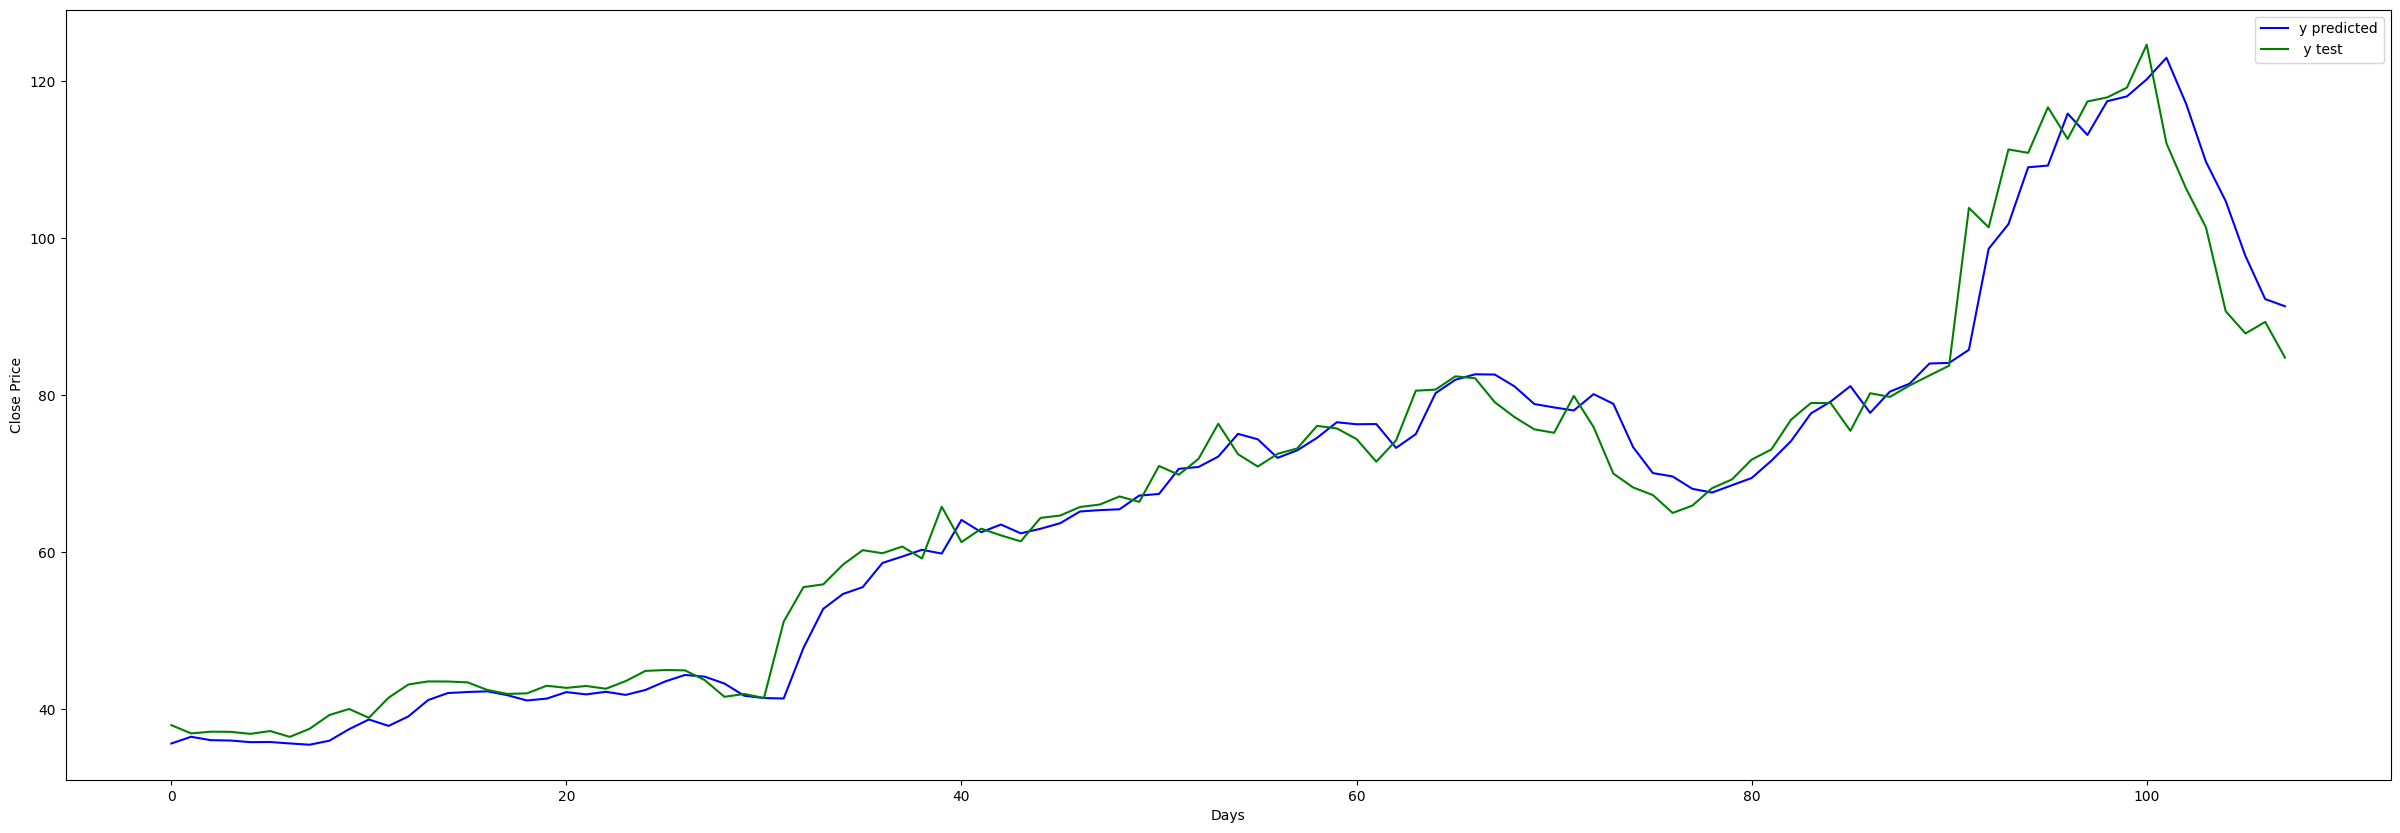

In [47]:
plt.figure(figsize=(30, 10))
plt.plot(y_pred_of_test, color='b', label='y predicted')
plt.plot( scaler.inverse_transform(y_test), color = 'g', label = ' y test')

plt.xlabel('Days')
plt.ylabel('Close Price')


plt.legend()

plt.show()

## LSTM Model Archittecture

In [49]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
hist= model_lstm.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 118533.0312
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 104279.7891
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 91431.7734
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 83256.7188
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 74766.0156
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 68178.2969
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 55394.5508
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 44570.9492
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 36486.2695
Epoch 10/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 29474.5586
Epoch 11/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 26247.7441
Epoch 12/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 22428.8203
Epoch 13/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 23109.1777
Epoch 14/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 19818.0117
Epoch 15/25
1

In [50]:
X_input=df.iloc[-time_step:].Close.values
X_input = scaler.fit_transform(X_input.reshape(-1, 1))
X_input = np.reshape(X_input, (1, 50, 1))
X_input.shape

(1, 50, 1)

## Predict Open value for next day

In [51]:
simple_RNN_prediction = scaler.inverse_transform(reg.predict(X_input))
simple_RNN_prediction[0, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


np.float32(87.5686)

In [53]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR
Date,,,,,
2025-02-21,101.349998,109.070000,100.000000,107.680000,129063200
2025-02-24,90.680000,99.010002,89.300003,95.879997,184485000
2025-02-25,87.839996,91.699997,85.250000,90.650002,132626300
2025-02-26,89.309998,91.690002,87.589996,89.160004,94428700
2025-02-27,84.769997,93.620003,84.169998,91.910004,99680500
